In [106]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [107]:
#Cargamos el dataset y mostramos las 5 primeras filas
data = pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [108]:
data.shape

(1599, 12)

In [109]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [110]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

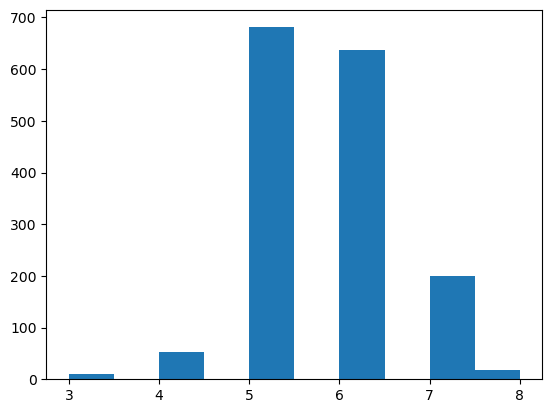

In [111]:
plt.hist(data.quality)

<Axes: xlabel='alcohol', ylabel='volatile acidity'>

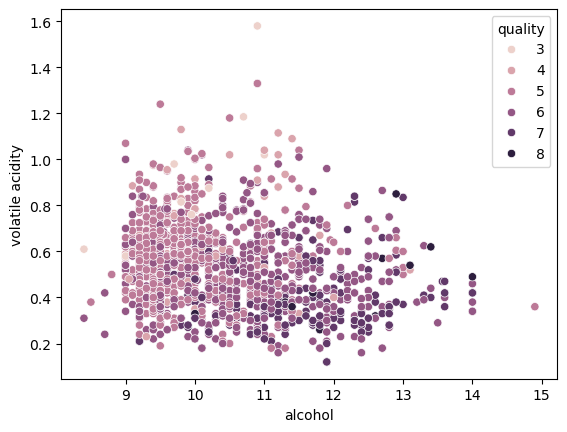

In [112]:
# Graficar la relación entre alcohol y acidez volátil, coloreado por calidad
sns.scatterplot( x ="alcohol", y = "volatile acidity", hue  ="quality", data = data)


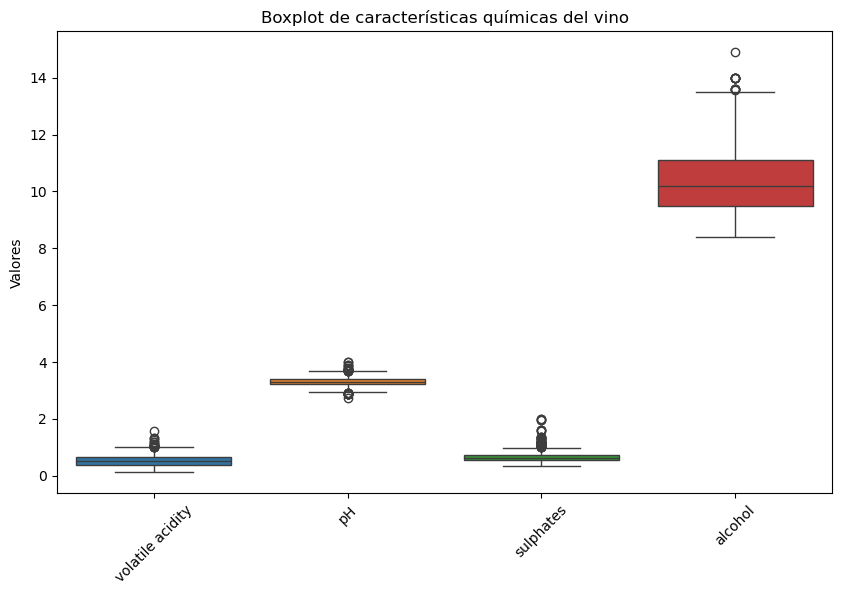

In [113]:
# Ajustamos las columnas de análisis en función de los parámetros del vino
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['volatile acidity', 'pH', 'sulphates', 'alcohol']])
plt.xticks(rotation=45)
plt.title('Boxplot de características químicas del vino')
plt.ylabel('Valores')
plt.show()

In [114]:
predictors_col = ["volatile acidity", "pH", "sulphates", "alcohol"]  # Ajusta a las variables relevantes en tu dataset
target_col = ['quality']

In [115]:
predictors = data[predictors_col]
target = data[target_col]

In [116]:
predictors

,volatile acidity,pH,sulphates,alcohol
0,0.700,3.51,0.56,9.4
1,0.880,3.20,0.68,9.8
2,0.760,3.26,0.65,9.8
3,0.280,3.16,0.58,9.8
4,0.700,3.51,0.56,9.4
...,...,...,...,...
1594,0.600,3.45,0.58,10.5
1595,0.550,3.52,0.76,11.2
1596,0.510,3.42,0.75,11.0
1597,0.645,3.57,0.71,10.2


In [117]:
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [118]:
corr = predictors.corr()
corr

,volatile acidity,pH,sulphates,alcohol
volatile acidity,1.000000,0.234937,-0.260987,-0.202288
pH,0.234937,1.000000,-0.196648,0.205633
sulphates,-0.260987,-0.196648,1.000000,0.093595
alcohol,-0.202288,0.205633,0.093595,1.000000


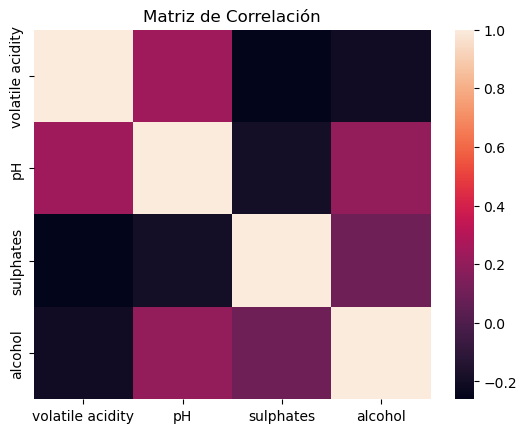

In [119]:
sns.heatmap(corr)
plt.title('Matriz de Correlación')
plt.show()

In [120]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

In [121]:
tree = DecisionTreeClassifier()

In [122]:
arbol = tree.fit(X_train, y_train)

[Text(0.4945422153089278, 0.9791666666666666, 'x[3] <= 10.525\ngini = 0.646\nsamples = 1279\nvalue = [9.0, 45.0, 535.0, 514.0, 164.0, 12.0]'),
 Text(0.15136422008392417, 0.9375, 'x[2] <= 0.535\ngini = 0.546\nsamples = 774\nvalue = [6, 29, 450, 260, 29, 0]'),
 Text(0.322953217696426, 0.9583333333333333, 'True  '),
 Text(0.02886702358558819, 0.8958333333333334, 'x[0] <= 0.335\ngini = 0.367\nsamples = 183\nvalue = [2, 13, 143, 24, 1, 0]'),
 Text(0.004630299522500362, 0.8541666666666666, 'x[2] <= 0.46\ngini = 0.562\nsamples = 11\nvalue = [0, 1, 4, 6, 0, 0]'),
 Text(0.002315149761250181, 0.8125, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2, 0, 0, 0]'),
 Text(0.006945449283750542, 0.8125, 'x[3] <= 9.35\ngini = 0.494\nsamples = 9\nvalue = [0, 1, 2, 6, 0, 0]'),
 Text(0.004630299522500362, 0.7708333333333334, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0, 0]'),
 Text(0.009260599045000723, 0.7708333333333334, 'x[1] <= 3.315\ngini = 0.375\nsamples = 8\nvalue = [0, 0, 2, 6, 0, 0]'),
 Text(0.00694

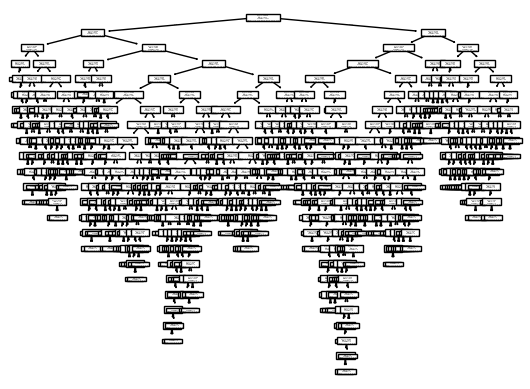

In [123]:
plot_tree(arbol)

In [124]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.15, random_state=13)

In [125]:
tree = DecisionTreeClassifier()

In [126]:
arbol_2 = tree.fit(X_train, y_train)

[Text(0.4461298597151076, 0.9821428571428571, 'x[3] <= 10.525\ngini = 0.644\nsamples = 1359\nvalue = [9.0, 46.0, 572.0, 546.0, 173.0, 13.0]'),
 Text(0.18365658005322652, 0.9464285714285714, 'x[2] <= 0.535\ngini = 0.545\nsamples = 826\nvalue = [6.0, 30.0, 481.0, 278.0, 31.0, 0.0]'),
 Text(0.3148932198841671, 0.9642857142857142, 'True  '),
 Text(0.03676455685940699, 0.9107142857142857, 'x[0] <= 0.335\ngini = 0.372\nsamples = 193\nvalue = [2.0, 14.0, 150.0, 26.0, 1.0, 0.0]'),
 Text(0.005188382886443323, 0.875, 'x[2] <= 0.46\ngini = 0.562\nsamples = 11\nvalue = [0, 1, 4, 6, 0, 0]'),
 Text(0.0025941914432216617, 0.8392857142857143, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2, 0, 0, 0]'),
 Text(0.007782574329664984, 0.8392857142857143, 'x[3] <= 9.35\ngini = 0.494\nsamples = 9\nvalue = [0, 1, 2, 6, 0, 0]'),
 Text(0.005188382886443323, 0.8035714285714286, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0, 0]'),
 Text(0.010376765772886647, 0.8035714285714286, 'x[1] <= 3.315\ngini = 0.375\nsamples

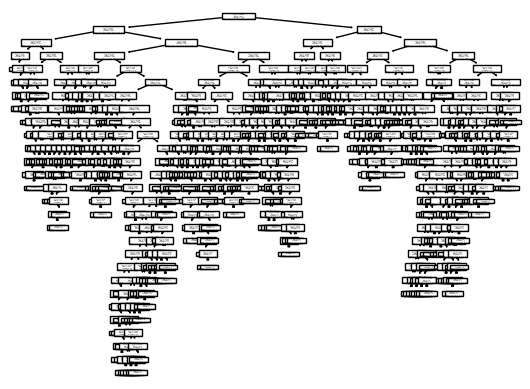

In [127]:
plot_tree(arbol_2)

In [128]:
predicciones = arbol.predict(X_test)

In [129]:
predicciones

array([6, 5, 5, 5, 6, 5, 6, 7, 6, 5, 5, 6, 5, 7, 7, 6, 6, 7, 5, 7, 5, 6,
       7, 5, 7, 5, 6, 5, 5, 7, 4, 6, 5, 6, 6, 6, 5, 5, 6, 6, 6, 4, 6, 6,
       5, 7, 6, 8, 7, 6, 6, 4, 6, 5, 7, 5, 5, 6, 5, 5, 6, 6, 5, 6, 7, 7,
       6, 6, 5, 6, 6, 5, 7, 6, 5, 5, 5, 5, 5, 5, 6, 7, 6, 5, 6, 7, 7, 6,
       7, 7, 5, 6, 6, 6, 6, 6, 5, 5, 6, 5, 6, 7, 5, 5, 6, 6, 6, 6, 5, 6,
       6, 7, 6, 6, 5, 7, 7, 7, 5, 6, 5, 4, 5, 7, 5, 4, 5, 5, 6, 7, 6, 5,
       5, 7, 6, 5, 7, 5, 6, 7, 5, 5, 3, 7, 7, 5, 6, 5, 5, 5, 5, 7, 5, 5,
       5, 4, 4, 5, 6, 6, 7, 6, 6, 4, 6, 7, 5, 6, 7, 6, 5, 5, 5, 5, 6, 5,
       5, 6, 5, 5, 5, 6, 6, 6, 5, 6, 6, 6, 6, 5, 5, 5, 7, 5, 5, 5, 7, 6,
       5, 5, 6, 6, 7, 6, 6, 6, 6, 5, 6, 6, 6, 5, 5, 6, 7, 5, 6, 6, 4, 6,
       5, 5, 6, 5, 7, 6, 5, 4, 4, 6, 6, 4, 6, 5, 5, 6, 6, 3, 6, 5],
      dtype=int64)

In [130]:
predicciones = arbol_2.predict(X_test)

In [131]:
predicciones

array([7, 4, 5, 5, 6, 5, 5, 7, 5, 4, 5, 6, 5, 6, 7, 6, 6, 5, 6, 7, 5, 6,
       7, 5, 6, 5, 6, 5, 4, 5, 6, 5, 5, 6, 5, 7, 5, 5, 6, 5, 6, 5, 6, 6,
       4, 5, 6, 7, 6, 6, 5, 5, 7, 5, 7, 6, 5, 6, 7, 5, 6, 5, 5, 5, 7, 7,
       6, 6, 5, 6, 6, 5, 8, 6, 6, 5, 5, 5, 5, 5, 6, 7, 6, 5, 6, 5, 7, 6,
       7, 6, 5, 6, 6, 6, 8, 6, 5, 5, 6, 5, 7, 7, 5, 5, 6, 6, 5, 6, 5, 6,
       6, 6, 5, 6, 5, 5, 7, 7, 5, 6, 5, 5, 5, 6, 5, 4, 5, 5, 6, 7, 6, 6,
       4, 7, 6, 5, 7, 5, 6, 7, 6, 5, 3, 7, 7, 5, 6, 5, 5, 6, 5, 7, 5, 5,
       5, 5, 6, 4, 6, 5, 7, 7, 6, 4, 6, 5, 5, 4, 5, 6, 5, 5, 5, 5, 6, 5,
       5, 5, 6, 5, 5, 6, 6, 6, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 7, 5, 7, 7,
       6, 4, 6, 6, 5, 6, 6, 7, 6, 5, 7, 6, 6, 5, 6, 6, 7, 5, 5, 5, 4, 5,
       5, 5, 5, 6, 6, 6, 5, 5, 4, 7, 6, 4, 6, 6, 5, 6, 6, 5, 6, 5],
      dtype=int64)

In [132]:
# Examinamos la matriz de confusión
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,3,4,5,6,7,8
Actual,,,,,,
3,0,0,0,1,0,0
4,0,2,5,0,0,0
5,1,6,77,21,4,0
6,0,4,19,54,15,0
7,0,1,2,6,15,2
8,0,0,0,4,1,0


In [133]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.6166666666666667

In [134]:
precision = precision_score(y_test, predicciones, average='weighted', zero_division=0)
precision

0.6311360790560384

In [135]:
recall = recall_score(y_test, predicciones, average='weighted')
recall

0.6166666666666667

In [136]:
f1 = f1_score(y_test, predicciones, average='weighted')
f1

0.6216098135334234

## Análisis de Resultados del Árbol de Decisión en la Calidad del Vino

Los resultados obtenidos del modelo de árbol de decisión para la clasificación de la calidad del vino presentan los siguientes valores:

Accuracy (Precisión): 0.62
Precision: 0.63
Recall: 0.62
F1 Score: 0.62

## Interpretación de los Resultados

Accuracy (Precisión): Un accuracy de 0.62 indica que aproximadamente el 62% de las predicciones realizadas por el modelo son correctas. Aunque este valor sugiere que el modelo tiene una capacidad moderada para clasificar correctamente los vinos, no es suficientemente alto, lo que podría ser indicativo de que el modelo necesita ajustes o mejoras. En el contexto de clasificación, se espera que el accuracy esté por encima del 70-80% para ser considerado efectivo.

Precision: Con una precision de 0.63, el modelo tiene una tasa razonable de aciertos al identificar las instancias positivas (en este caso, la calidad del vino). Este valor indica que aproximadamente el 63% de las predicciones positivas son realmente correctas. Aunque es un valor aceptable, una precisión más alta sería deseable, especialmente si se trata de una clasificación crítica.

Recall: El recall de 0.62 refleja que el modelo está identificando el 62% de las instancias realmente positivas. Este valor es fundamental en contextos donde es crucial identificar todas las instancias de una clase (por ejemplo, identificar todos los vinos de alta calidad). Un recall bajo puede significar que se están perdiendo clasificaciones importantes, lo que puede llevar a decisiones erróneas en un entorno comercial.

F1 Score: El F1 score de 0.62 es un balance entre precision y recall. Este valor es útil para evaluar el modelo en un escenario de clases desbalanceadas, donde es crítico que tanto la precisión como el recall sean considerados. Un F1 score cercano a 0.62 sugiere que el modelo tiene un rendimiento moderado, pero podría mejorarse, especialmente si se consideran aspectos más críticos en la clasificación de calidad del vino.
